In [1]:
import seaborn as sns
#from params import SidartheParamGenerator

In [25]:
import random

# original params taken from Giordano's paper
from typing import Dict

default_param_types = {
    "alpha": "dyn",
    "beta": "dyn",
    "gamma": "dyn",
    "delta": "dyn",
    "epsilon": "dyn",
    "theta": "const",
    "zeta": "dyn",
    "eta": "dyn",
    "mu": "dyn",
    "nu": "dyn",
    "tau": "const",
    "lambda": "dyn",
    "kappa": "dyn",
    "xi": "dyn",
    "rho": "dyn",
    "sigma": "dyn",
    "phi": "dyn",
    "chi": "dyn"
}

giordano_params = {
    "alpha": [0.570] * 4 + [0.422] * 18 + [0.360] * 6 + [0.210] * 11,
    "beta": [0.011] * 4 + [0.0057] * 18 + [0.005] * 17,
    "gamma": [0.456] * 4 + [0.285] * 18 + [0.2] * 6 + [0.11] * 11,
    "delta": [0.011] * 4 + [0.0057] * 18 + [0.005] * 17,
    "epsilon": [0.171] * 12 + [0.143] * 26 + [0.2],
    "theta": [0.371],
    "zeta": [0.125] * 22 + [0.034] * 16 + [0.025],
    "eta": [0.125] * 22 + [0.034] * 16 + [0.025],
    "mu": [0.017] * 22 + [0.008] * 17,
    "nu": [0.027] * 22 + [0.015] * 17,
    "tau": [0.01],
    "lambda": [0.034] * 22 + [0.08] * 17,
    "kappa": [0.017] * 22 + [0.017] * 16 + [0.02],
    "xi": [0.017] * 22 + [0.017] * 16 + [0.02],
    "rho": [0.034] * 22 + [0.017] * 16 + [0.02],
    "sigma": [0.017] * 22 + [0.017] * 16 + [0.01]
}

random_ranges = {
    "alpha": (0.1, 0.7),
    "beta": (0.001, 0.03),
    "gamma": (0.1, 0.7),
    "delta": (0.001, 0.04),
    "epsilon": (0.1, 0.4),
    "theta": (0.1, 0.5),
    "zeta": (0.01, 0.3),
    "eta": (0.01, 0.3),
    "mu": (0.001, 0.05),
    "nu": (0.002, 0.1),
    "tau": (0.005, 0.02),
    "lambda": (0.01, 0.06),
    "kappa": (0.005, 0.03),
    "xi": (0.005, 0.03),
    "rho": (0.01, 0.06),
    "sigma": (0.005, 0.03)
}

# params with changed tau and added phi and chi
sidarthe_extended_params = {
    "alpha": [0.570] * 4 + [0.422] * 18 + [0.360] * 6 + [0.210] * 11,
    "beta": [0.011] * 4 + [0.0057] * 18 + [0.005] * 17,
    "gamma": [0.456] * 4 + [0.285] * 18 + [0.2] * 6 + [0.11] * 11,
    "delta": [0.011] * 4 + [0.0057] * 18 + [0.005] * 17,
    "epsilon": [0.171] * 12 + [0.143] * 26 + [0.2],
    "theta": [0.371],
    "zeta": [0.125] * 22 + [0.034] * 16 + [0.025],
    "eta": [0.125] * 22 + [0.034] * 16 + [0.025],
    "mu": [0.017] * 22 + [0.008] * 17,
    "nu": [0.027] * 22 + [0.015] * 17,
    "tau": [0.15],
    "lambda": [0.034] * 22 + [0.08] * 17,
    "kappa": [0.017] * 22 + [0.017] * 16 + [0.02],
    "xi": [0.017] * 22 + [0.017] * 16 + [0.02],
    "rho": [0.034] * 22 + [0.017] * 16 + [0.02],
    "sigma": [0.017] * 22 + [0.017] * 16 + [0.01],
    "phi": [0.02] * 39,
    "chi": [0.02] * 39
}

extended_random_ranges = {
    "alpha": (0.1, 0.7),
    "beta": (0.001, 0.03),
    "gamma": (0.1, 0.7),
    "delta": (0.001, 0.04),
    "epsilon": (0.1, 0.4),
    "theta": (0.1, 0.5),
    "zeta": (0.01, 0.3),
    "eta": (0.01, 0.3),
    "mu": (0.001, 0.05),
    "nu": (0.002, 0.1),
    "tau": (0.1, 0.3),
    "lambda": (0.01, 0.06),
    "kappa": (0.005, 0.03),
    "xi": (0.005, 0.03),
    "rho": (0.01, 0.06),
    "sigma": (0.005, 0.03),
    "phi": (0.005, 0.04),
    "chi": (0.005, 0.04)
}

class SidartheParamGenerator:
    def __init__(self):
        self.base_params = {}
        self.param_types = {}
        self.random_ranges = {}

    @staticmethod
    def __random_fill_list(param_list, param_range):
        list_len = len(param_list)

        #if list_len == 1:
        #    param_list[0] = random.uniform(param_range[0], param_range[1])

        curr_index = 0
        while curr_index < list_len:
            next_index = random.randint(curr_index+1, list_len)
            rand_value = random.uniform(param_range[0], param_range[1])
            for i in range(curr_index, next_index):
                param_list[i] = rand_value
            curr_index = next_index

    def set_param_types(self, param_types="default"):
        if param_types is None or param_types == 'default':
            self.param_types = default_param_types.copy()
        else:
            self.param_types = default_param_types.copy()
            self.param_types.update(param_types)

    def random_init(self, length=39, ranges="giordano"):
        if ranges is None or ranges == "giordano":
            self.random_ranges = random_ranges
        elif ranges == "extended":
            self.random_ranges = extended_random_ranges

        random_params = {}
        for param_key, param_range in self.random_ranges.items():
            if self.param_types[param_key] == "const":
                param_list = [0.]
            else:
                param_list = [0.]*length

            self.__random_fill_list(param_list, param_range)
            random_params[param_key] = param_list

        self.base_params = random_params

    def init_from_base_params(self, params="giordano"):
        """

        :param params: one of "giordano", "extended", or a dict with the params
        :return:
        """
        if params == "giordano":
            self.base_params = giordano_params.copy()
        elif params == "extended":
            self.base_params = sidarthe_extended_params.copy()
        elif type(params) is dict:
            self.base_params = params

    def perturb(self, mu=0.0, sigma=0.01):
        eps = 1e-8
        for k, weights in self.base_params.items():
            self.base_params[k] = [max(eps, min(w + random.gauss(mu, sigma), 1.0)) for w in weights]

    def extend(self, total_days):
        base_params = self.base_params
        for key in self.base_params.keys():
            base_param = base_params[key]
            current_len = len(base_param)

            # skip constant params
            if self.param_types[key] == 'const':
                continue

            to_add = total_days - current_len
            if to_add < 0:
                raise Exception("param total_days must be higher than ")

            base_params[key] = base_param + base_param[-1:]*to_add

    @property
    def params(self):
        return self.base_params

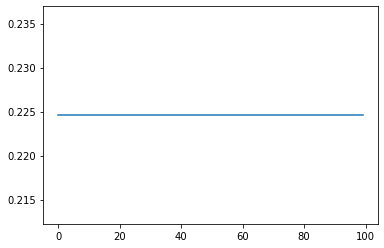

In [31]:
gen = SidartheParamGenerator()

gen.set_param_types(param_types={'tau':'const'})
gen.init_from_base_params(ranges="extended")
#gen.init_from_base_params("giordano")
gen.extend(100)
#gen.perturb(sigma=0.01)
params = gen.params

pl_x = range(0, len(params["alpha"]))

for key, param in params.items():
    if len(param) == 1:
        param = param * len(pl_x)

    if key == 'tau':
        sns.lineplot(pl_x, param)